In [1]:
# Plotting with categorical data
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', color_codes=True)

# As a catplot() function of the figure-level interface,
# on axis-level there are categorical functions: scatterplots,
# distribution plots and estimate plots(default catplot uses scatterplot)

<h3>Categorical scatterplots</h3>

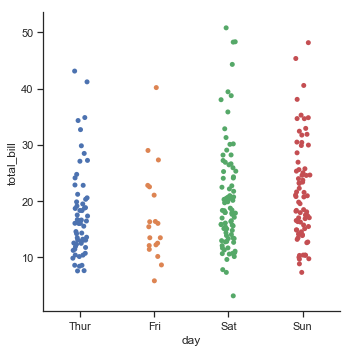

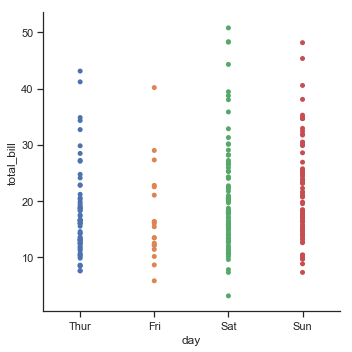

In [4]:
tips = sns.load_dataset('tips')
sns.catplot(x='day', y='total_bill', data=tips)

# small 'jitter'(not in line with xticklabel) can be disabled
sns.catplot(x='day', y='total_bill', jitter=False, data=tips);

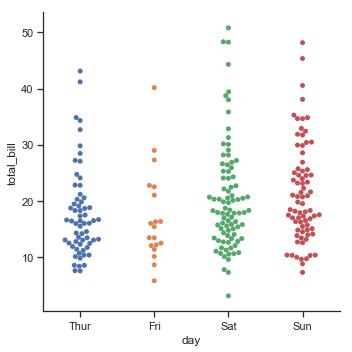

In [3]:
# another approach for scatterplot prevents from overlapping
sns.catplot(x='day', y='total_bill', kind='swarm', data=tips);

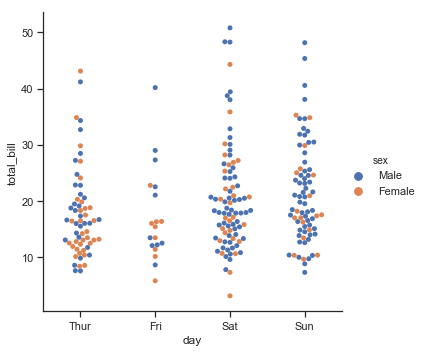

In [4]:
# categorical plots do not support size or style semanthic,
# only hue semantic is possible to use(different functions handle
# hue in different way - scatter changes colors)
sns.catplot(x='day', y='total_bill', hue='sex', kind='swarm', data=tips);

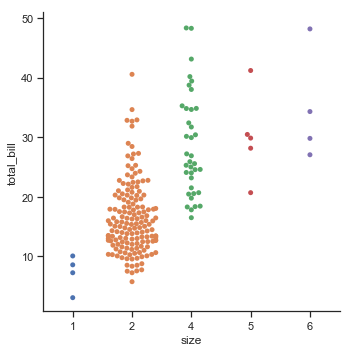

In [5]:
# ordering categorical variable when numerical is given
# the levels will be sorted
sns.catplot(x='size', y='total_bill', kind='swarm',
           data=tips.query('size!=3'));

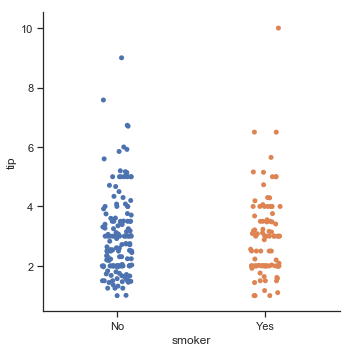

In [6]:
# example of using order option for x data
sns.catplot(x='smoker', y='tip', order=['No', 'Yes'], data=tips);

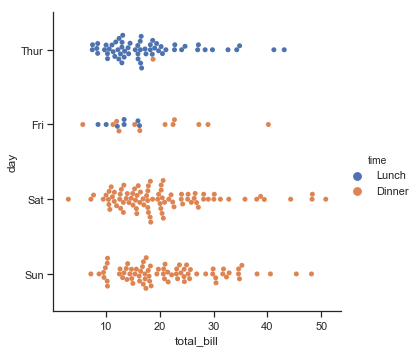

In [7]:
# categorical variable on the vertical axis
#(for example when category names are long)
sns.catplot(x='total_bill', y='day', hue='time', kind='swarm', data=tips);

<h3>Distribution of observations within categories</h3>

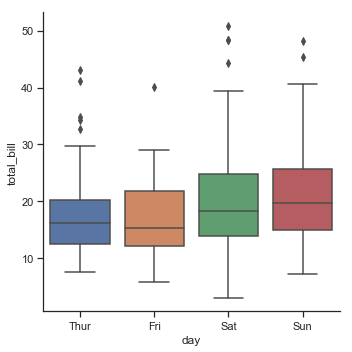

In [8]:
# especially for bigger datasets to provide better info on distribution
# 'whiskers' extendt to the points that lie within 1.5 IQRs
# of the lower and upper quartile; outsiders are out of whiskers
sns.catplot(x='day', y='total_bill', kind='box', data=tips)

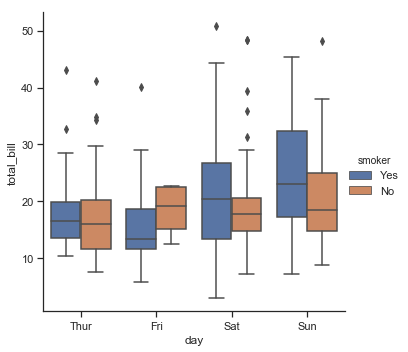

In [9]:
# while using 'hue' semanthic boxes are moved aside
# to not overlap(called 'dodging' and default is True)
sns.catplot(x='day', y='total_bill', hue='smoker',
            kind='box', data=tips);

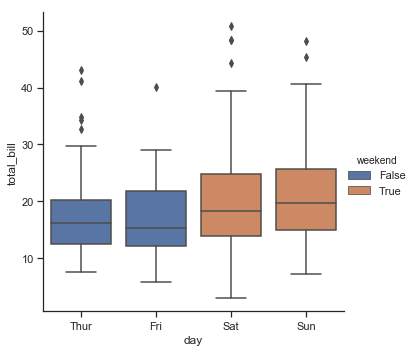

In [10]:
# when hue variable is not nested in main categorical
# variable dodging is unnecessary and can be disabled
tips['weekend'] = tips['day'].isin(['Sat', 'Sun'])
sns.catplot(x='day', y='total_bill', hue='weekend',
           kind='box', dodge=False, data=tips);

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


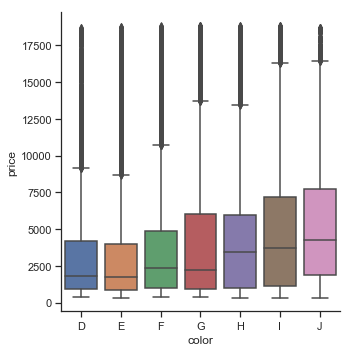

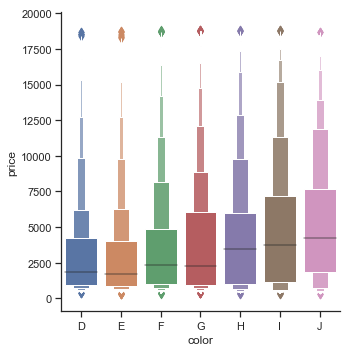

In [13]:
# boxenplot is similar to boxplot but optimized for
# for showing more information about shape of distribution
# better suited for larger datasets
diamonds = sns.load_dataset('diamonds')
diamonds.head()
sns.catplot(x='color', y='price', kind='box', data=diamonds.sort_values('color'))
sns.catplot(x='color', y='price', kind='boxen',
           data=diamonds.sort_values('color'))

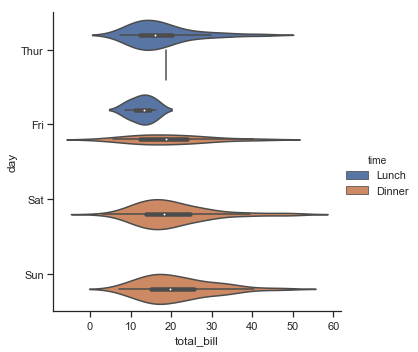

In [15]:
# violinplot() combines boxplot with the kernel density
# estimation procedure
sns.catplot(x='total_bill', y='day', hue='time',
            kind='violin', data=tips);

In [20]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,weekend
0,16.99,1.01,Female,No,Sun,Dinner,2,True
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,True
4,24.59,3.61,Female,No,Sun,Dinner,4,True


In [74]:
# checking why there are no Dinner data on Thursday
tips.shape
m = tips[tips['day']=='Thur']
m[m['time']=='Dinner'].count()

(244, 8)

total_bill    1
tip           1
sex           1
smoker        1
day           1
time          1
size          1
weekend       1
dtype: int64

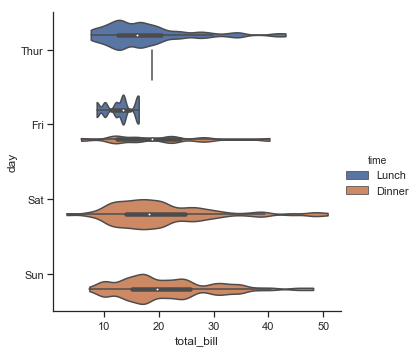

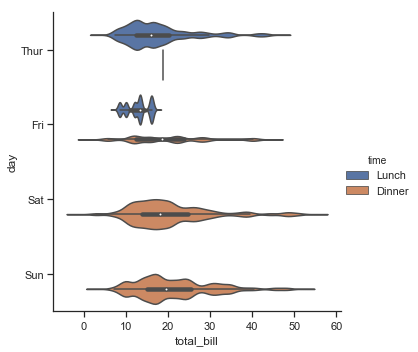

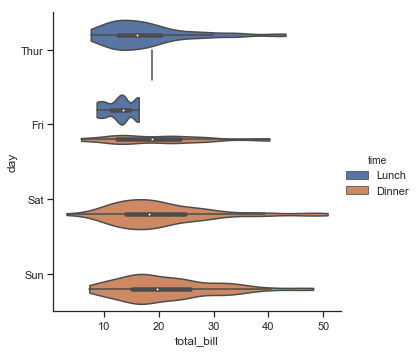

In [95]:
# the same with additional params like bw(scale factor of bandwidth) or
# cut - distance, which extends the density past extreme datapoints
sns.catplot(x='total_bill', y='day', hue='time',
           kind='violin', bw=.15, cut=0, data=tips)
sns.catplot(x='total_bill', y='day', hue='time',
           kind='violin', bw=.15, cut=5, data=tips)
sns.catplot(x='total_bill', y='day', hue='time',
           kind='violin', bw=0.3, cut=0, data=tips)

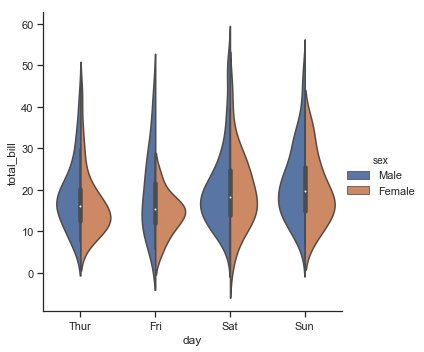

In [97]:
# splitting the violin when hue has only 2 levels
sns.catplot(x='day', y='total_bill', hue='sex',
           kind='violin', split=True, data=tips);

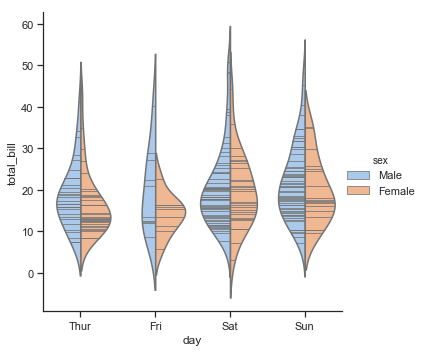

In [99]:
# showing each individual observation instead of summary boxplot values
sns.catplot(x='day', y='total_bill', hue='sex',
           kind='violin', inner='stick', split=True,
           palette='pastel', data=tips);

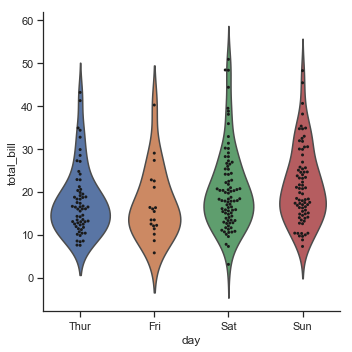

In [113]:
# combining swarmplot() with a violinplot(or boxplot)
g = sns.catplot(x='day', y='total_bill', kind='violin',
               inner=None, data=tips)
sns.swarmplot(x='day', y='total_bill', color='k',
             size=3, data=tips, ax=g.ax);


<h3>Statistical estimation within categories</h3>

Barplots

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


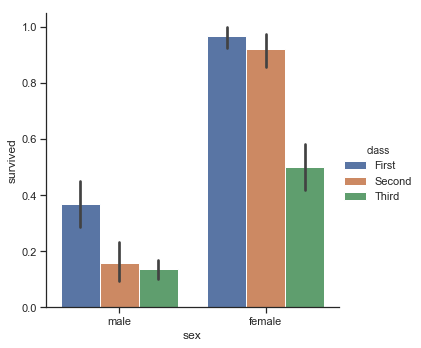

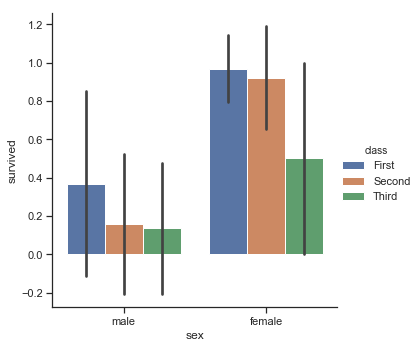

In [149]:
# Bar plots - when there are multiple observations in each
# category confidence intervals and error bars are computed
# default confidence interval ci=95 (vertical line)
titanic = sns.load_dataset('titanic')
titanic.head(3)
sns.catplot(x='sex', y='survived', hue='class',
           kind='bar', data=titanic)
sns.catplot(x='sex', y='survived', hue='class',
           kind='bar', ci='sd', data=titanic) # for standard deviation

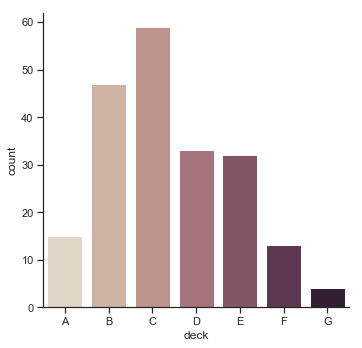

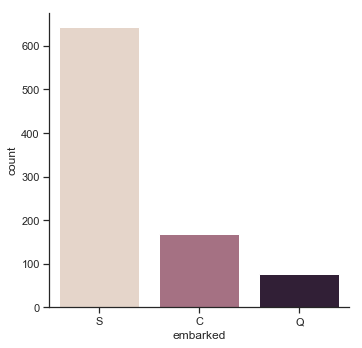

In [146]:
# special case - showing the number of observations in each
# category rather than computing statistic for a second var
sns.catplot(x='deck', kind='count', palette='ch:.25', data=titanic);
sns.catplot(x='embarked', kind='count', palette='ch:.15', data=titanic)

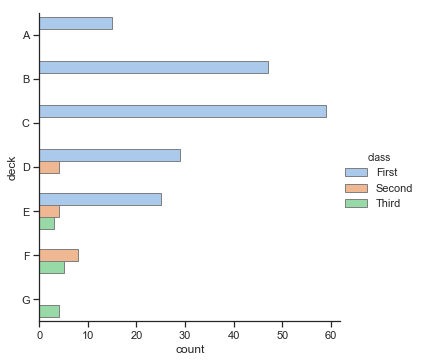

In [156]:
# more possibilities and options
sns.catplot(y='deck', hue='class', kind='count',
           palette='pastel', edgecolor='.5', data=titanic);

In [203]:
# learning why so small number with deck info
titanic['deck'][titanic['deck'].isin([
    'A','B','C','D','E','F','G'])].count()
list(titanic['deck'].value_counts(dropna=False))
titanic['deck'].isnull().sum()

203

[688, 59, 47, 33, 32, 15, 13, 4]

688

Point plots

0    549
1    342
Name: survived, dtype: int64

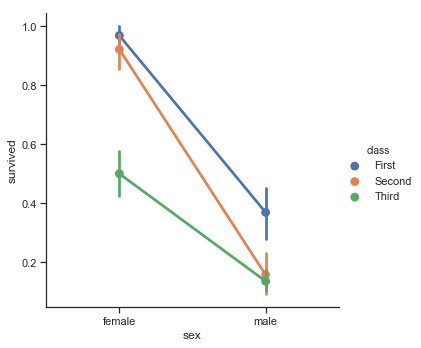

In [221]:
# estimation points(survival probability) with confidence interval
# connection line for hue categories shows
# the change of relationship between main variables
titanic['survived'].value_counts()
sns.catplot(x='sex', y='survived', hue='class',
           kind='point', order=['female', 'male'], data=titanic)

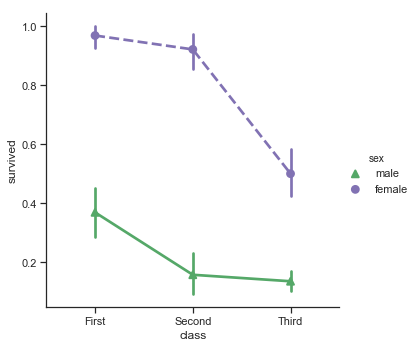

In [222]:
# even without additional semanthin in categorical funcs
# is possible to vary marker or linestyle
sns.catplot(x='class', y='survived', hue='sex',
           palette={'male':'g', 'female':'m'},
            markers=['^', 'o'], linestyles=['-','--'],
           kind='point', data=titanic);

<h3>Plotting 'wide-form' data</h3>

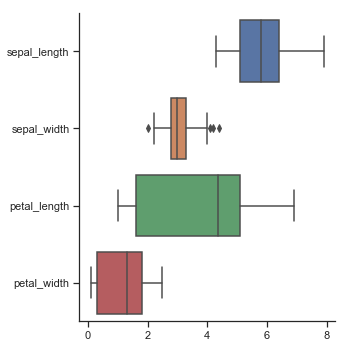

In [223]:
iris = sns.load_dataset('iris')
sns.catplot(data=iris, orient='h', kind='box');

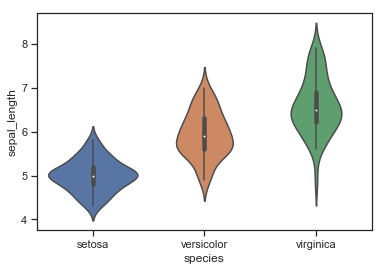

In [225]:
# axes-level functions accept also vectors of Pandas or numpy
# rather than variables in a DataFrame
sns.violinplot(x=iris.species, y=iris.sepal_length);

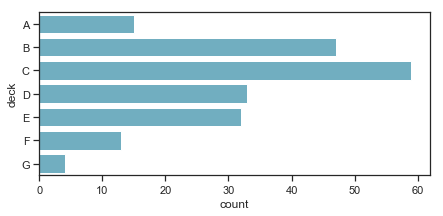

In [227]:
# for controlling the size and shape of plots setting up
# the figure with matplotlib commands is necessary
f, ax = plt.subplots(figsize=(7,3))
sns.countplot(y='deck', data=titanic, color='c');

<h3>Showing multiple relationships with facets</h3>

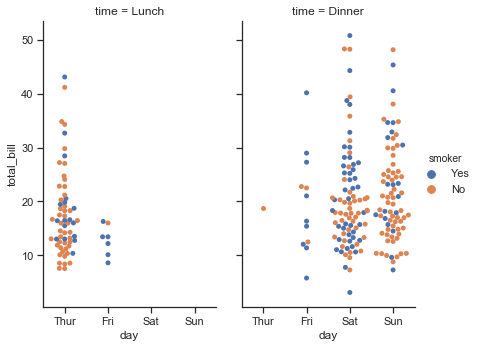

In [236]:
#adding faceting variables to figure-level functions
# in purpose of visualizing higher-dimensional relationships
sns.catplot(x='day', y='total_bill', hue='smoker',
           col='time', aspect=.6, kind='swarm', data=tips);

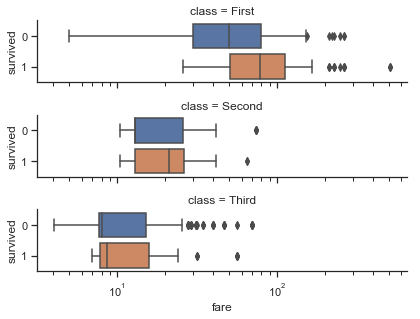

In [237]:
# further customization of the plot
g = sns.catplot(x='fare', y='survived', row='class',
               kind='box', orient='h', height=1.5, aspect=4,
               data=titanic.query('fare>0'))
g.set(xscale='log');

In [245]:
titanic[titanic['fare']==0]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
179,0,3,male,36.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
263,0,1,male,40.0,0,0,0.0,S,First,man,True,B,Southampton,no,True
271,1,3,male,25.0,0,0,0.0,S,Third,man,True,NaN,Southampton,yes,True
277,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
302,0,3,male,19.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
413,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
466,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
481,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
597,0,3,male,49.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
633,0,1,male,NaN,0,0,0.0,S,First,man,True,NaN,Southampton,no,True
